In [10]:
import librosa
import numpy as np
from scipy.stats import kurtosis
import soundfile as sf
import pandas as pd
import os
import sys
from IPython.display import display, HTML
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Kurtosis para analizar audios de ruido impulsivo

### Introducción

Dentro del área del ruido ocupacional, es sabido que el ruido impulsivo es conocido por ser más dañino que el ruido continuo. Esto se debe a la gran cantidad de energía generada en un lapso muy corto de tiempo. Desafortunadamente el oído humano no llega a protegerse eficientemente de este tipo de acontecimientos sonoros. Mecanísmos de defensa del sistema auditivo, como el músculo estapedio, no tienen un tiempo de reacción lo suficientemente rápido (Berger et al., 2000). Por lo tanto, toda la energía entra al oido sin ningún tipo de amortiguamiento previo, lo cual termina deteriorando los cilios en la cóclea del oido interno. Por esta razón, se comenzó a tomar en cuenta este fenómeno dentro de las normas de ruido ocupacional como la ISO 1999 y ANSI S3.44 (1996), entre otras. Sin embargo, se han seguido haciendo estudios al respecto, en especial con la combianción del ruido impulsivo con ruido de fondo, denominado "ruido gaussiano". A la combinación de ambos ruidos se denomina ruido complejo. La kurtosis ha probado ser una herramienta útil para analizar el ruido complejo (Qiu et al., 2020). La mayoría de los estudios realizados usando esta herramienta estadística se han enfocado principalmente en los ruidos impulsivos generados en el área de la industria. Por ejemplo están los trabajos de Arenas en 2021 y de Zhang et al. en 2022.

Este trabajo busca analizar un área distina: el área de la música. Los músicos generan deterioramiento auditivo a lo largo de su vida por su constante exposición a altos niveles sonoros y se ha detectado que los que tienen este problema en mayor medida son los percusionistas (Chasin, 1998). Con esta problemática en mente, se presentará a continuación un análisis de la kurtosis de audios de los distintos elementos de la batería. Se comenzará por definir la kurtosis y presentar las fórmulas necesarias para leer y analizar los audios en python. Después se mostrarán los resultados obtenidos al analizar las pistas sin ninguna alteración y sumándole distintos niveles de ruido gaussiano. Finalmente, a partir de los resultados se darán las conclusiones y posibles trabajos a futuro.

### Marco teórico

A continuación se presentarán las funciones que se utilizarán para anlizar los audios. Cabe destacar que estas todas menos las correciones de audio no se programarán de cero, ya que vienen incorporadas en las librerías importadas anteriormente.

#### Ecuaciones necesarias para la lectura de audios

Se importarán audios de 1 segundo para mostrar los elementos de la batería y de 15 segundos con secuencias creadas sintéticamente. Los datos que se obtienen de los audios, tienen valores que oscilan entre 1 y -1, por lo cual se les debe dar un valor referencial,

$ $

#### Kurtosis
La kurtosis es una medida estadística que describe en qué medida la cola de una distribución difiere de una distribución. En palabras más simples, nos da información sobre qué tan picuda es la distrubación de los datos. El valor de la kurtosis es proporcional al daño auditivo (Qiu et al., 2020). La kurtosis se denotará con la letra griega $ \beta $ y se puede calcular con la siguiente ecuación:

<div style="text-align: center;">
$ \beta = \frac{ n \sum_{i=1}^{n} (x_i - \bar{x})^4}{\left(  \sum_{i=1}^{n} (x_i - \bar{x})^2 \right)^2}$

Cabe destacar que la kurtosis de un ruido gaussiano tiene el valor de $ \beta = 3 $.

#### Partes de la batería
A continuación se mostrará la imagen de una batería y sus partes. Esta es solo una imgane de referencia para poder entender mejor qué representa cada audio. Cabe destacar que el "Bass Drum" tiene el nombre "Kick" en los audios. Además los diferentes Tom y Crash son distinguidos por su tamaño en pulgadas. Los audios fueron grabados a la altura de ambas orejas de un bateriasta, por lo tanto se tienen dos audios por elemento de la batería.


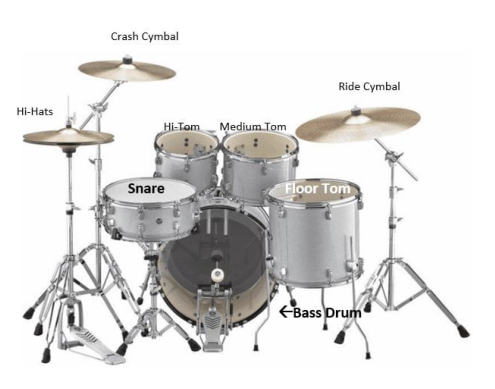

In [13]:
# Ruta de la Imagen de la batería
image_path = '/Users/chiaravald/Desktop/ACUS340/Drum_parts.jpeg' 

# Cargar y mostrar la imágen
image_read = mpimg.imread(image_path)
img = plt.imshow(img)
plt.axis('off')  # ocultar los ejes
plt.show()


### Lectura y análisis de audios 


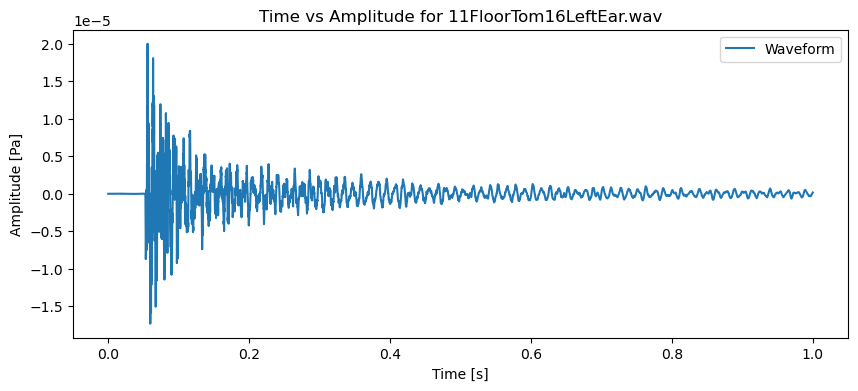

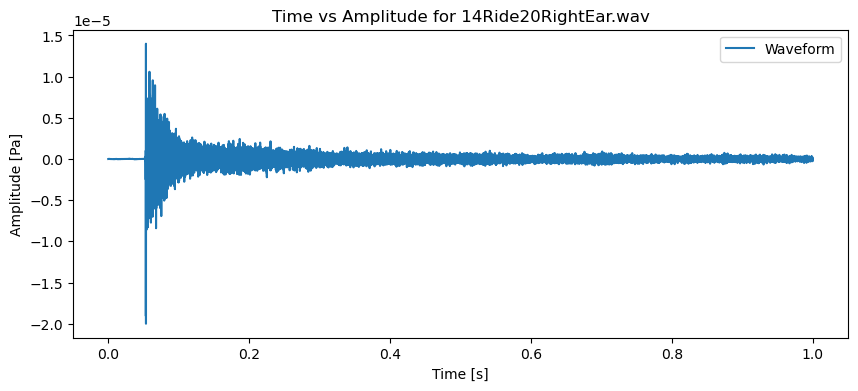

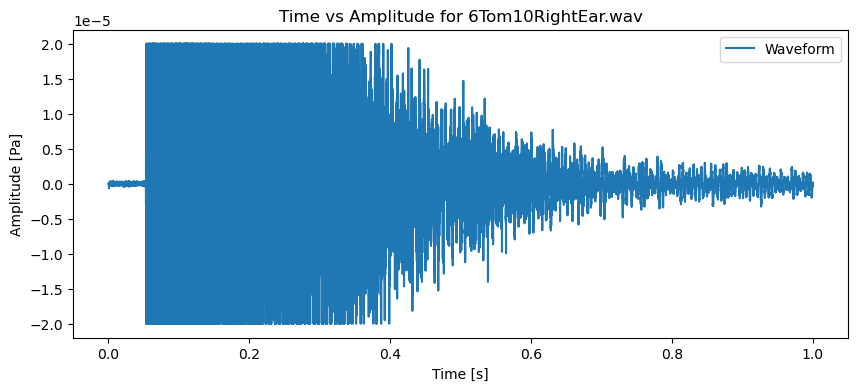

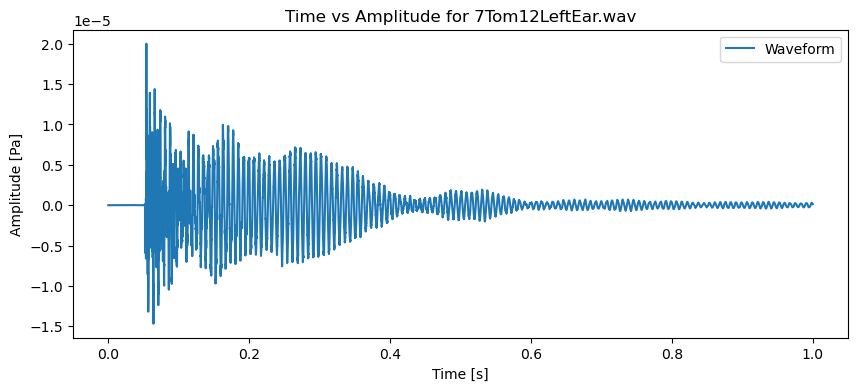

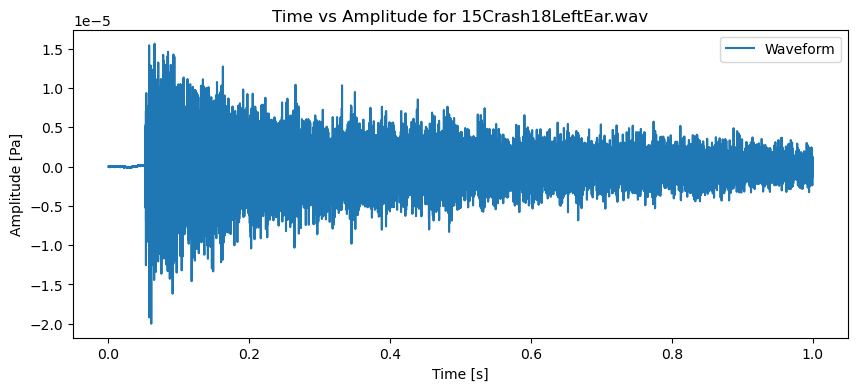

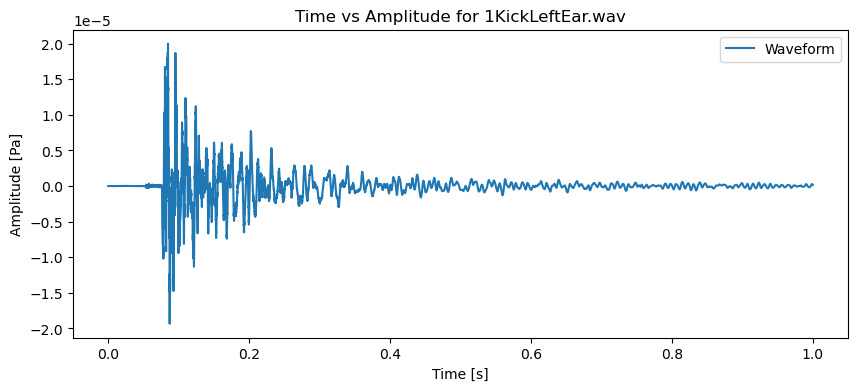

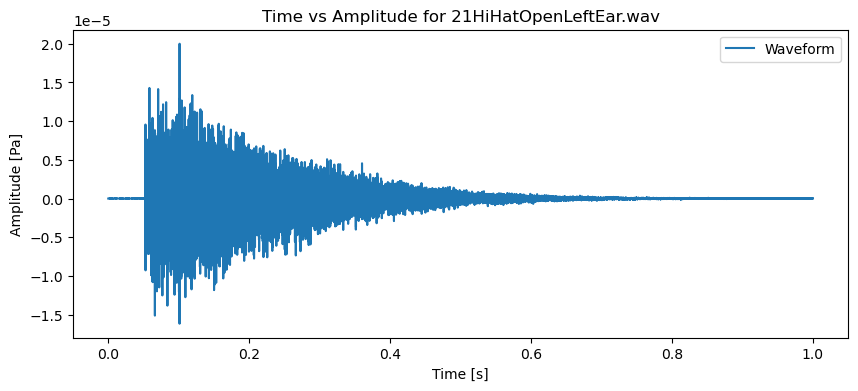

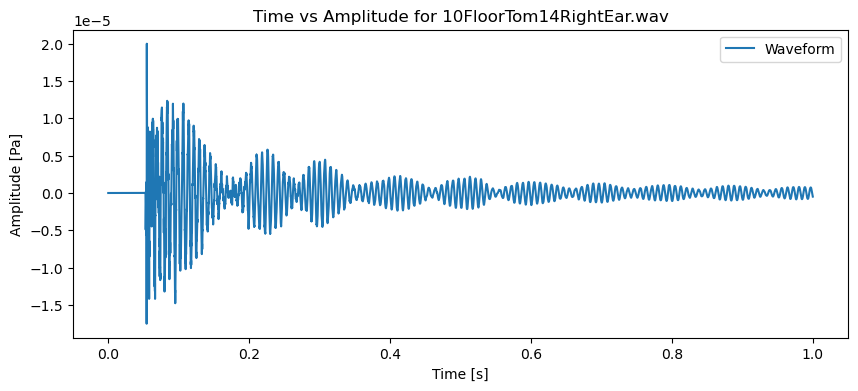

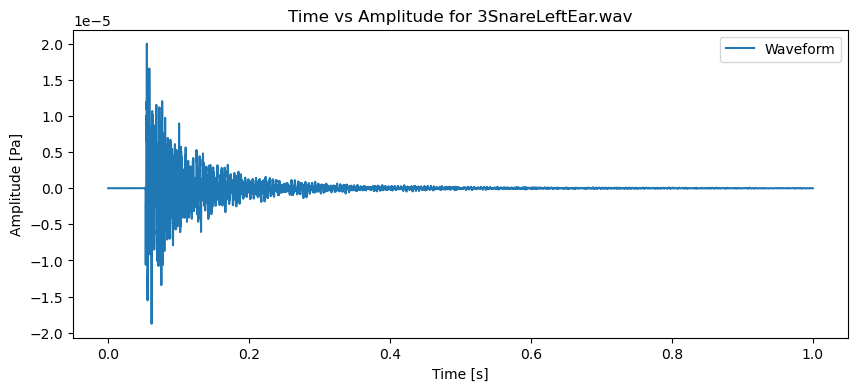

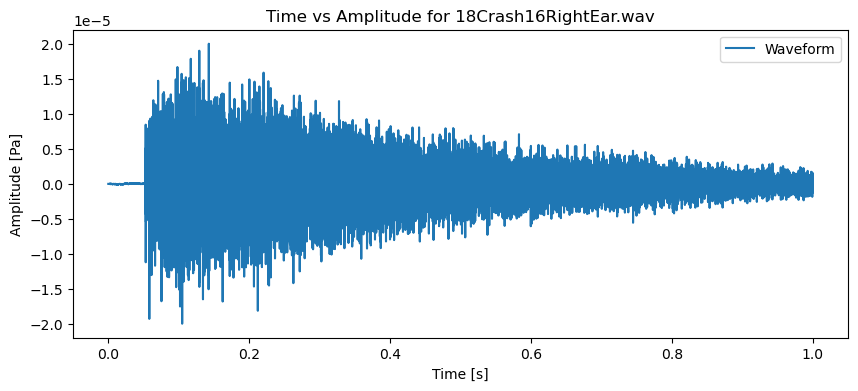

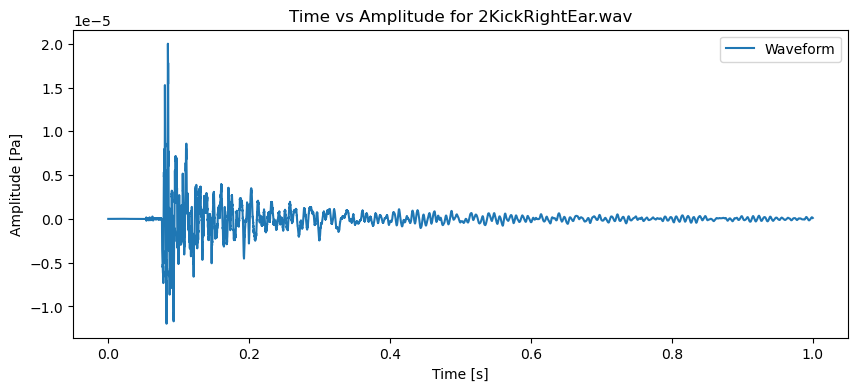

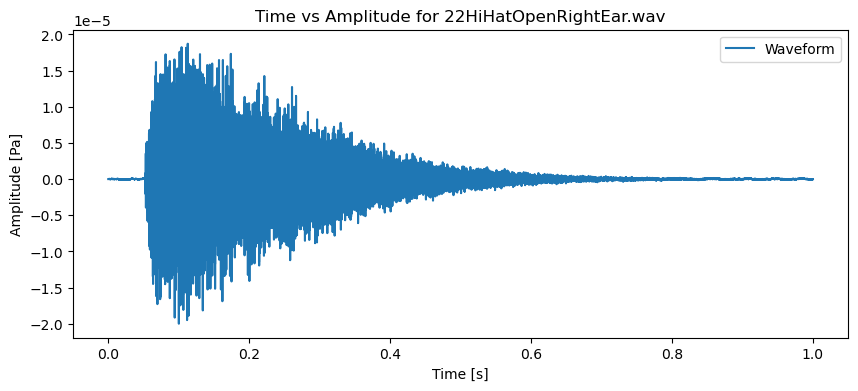

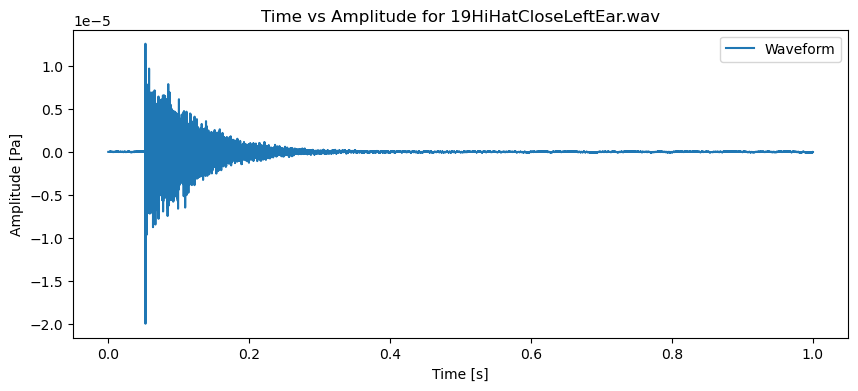

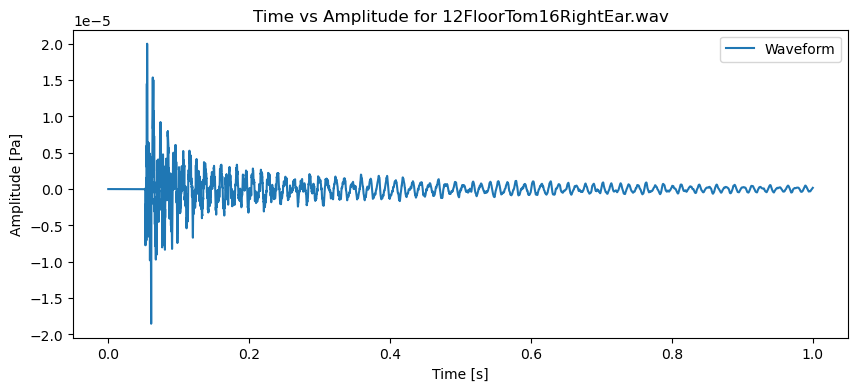

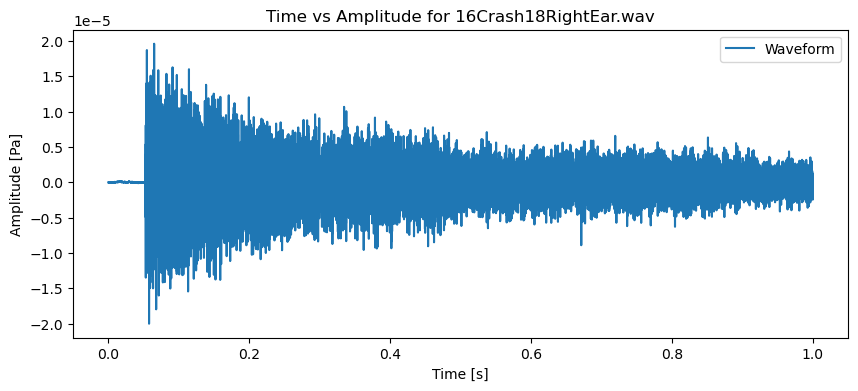

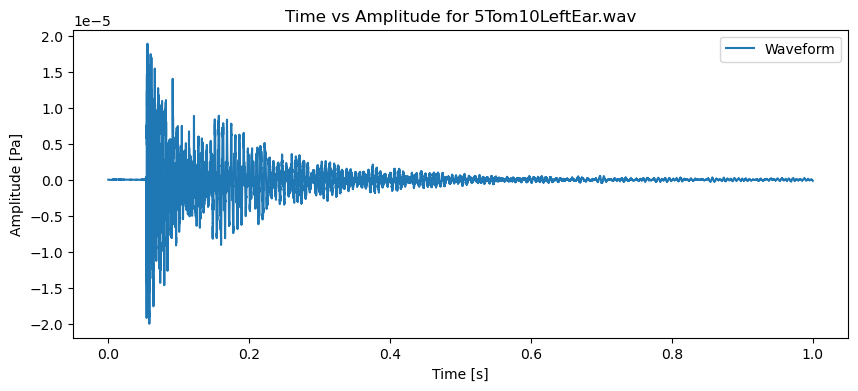

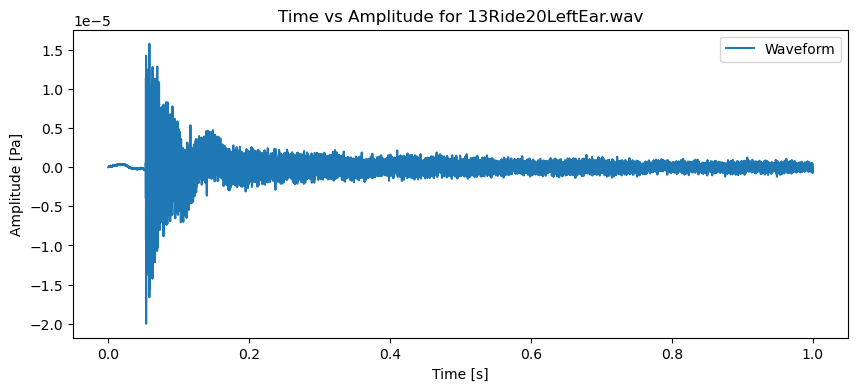

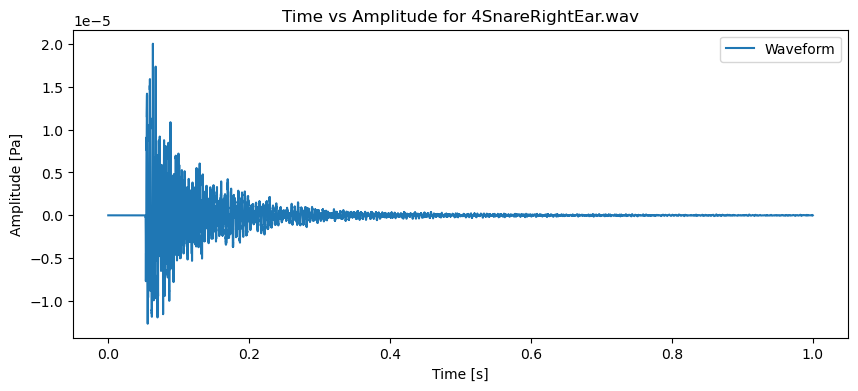

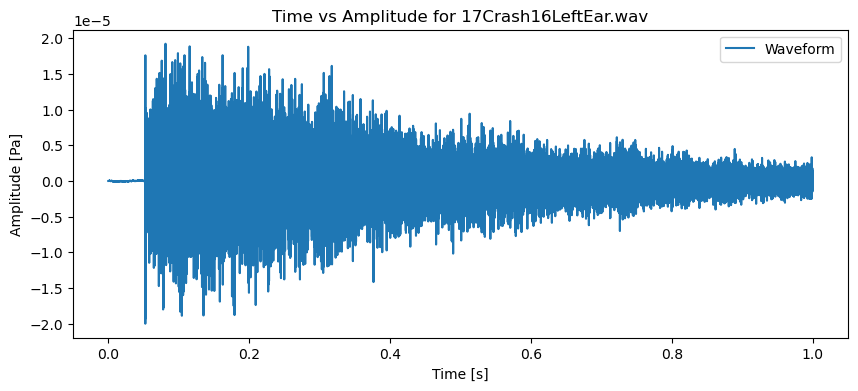

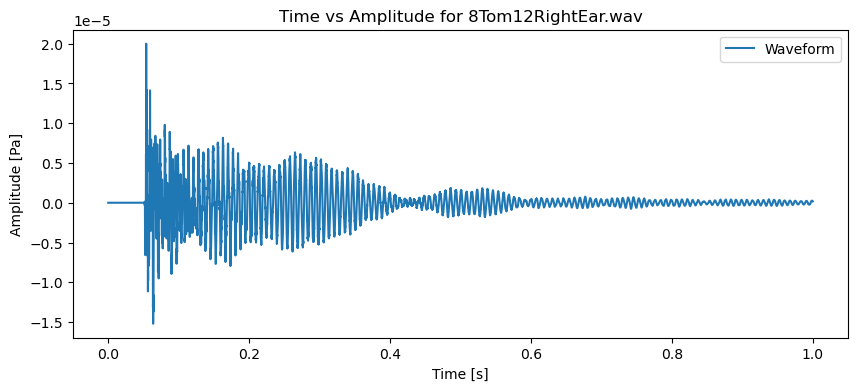

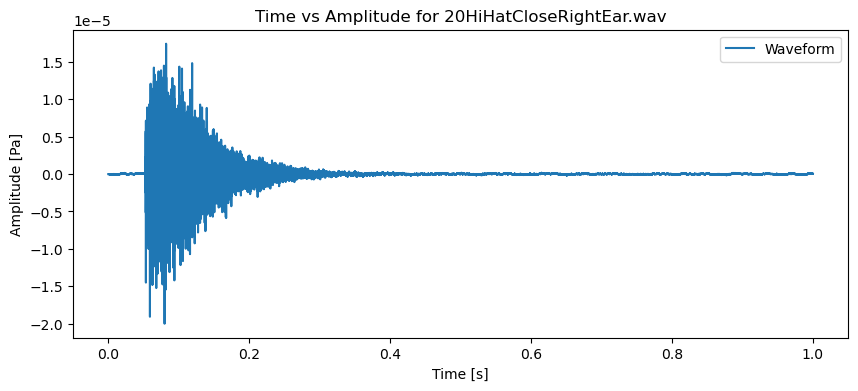

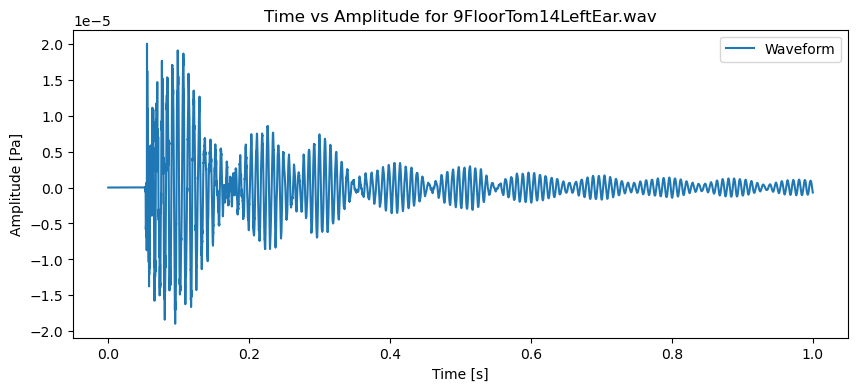

{'11FloorTom16LeftEar.wav': array([0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 1.6541536e-07,
        1.6846731e-07, 1.7029848e-07], dtype=float32),
 '14Ride20RightEar.wav': array([ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00, ...,
        -4.9438476e-08, -4.2114255e-08, -1.1596679e-08], dtype=float32),
 '6Tom10RightEar.wav': array([-6.1035155e-10, -6.1035155e-10, -1.2207031e-09, ...,
         6.1645508e-08,  1.2023925e-07,  1.6357421e-07], dtype=float32),
 '7Tom12LeftEar.wav': array([0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 1.5564440e-07,
        1.5137181e-07, 1.4648884e-07], dtype=float32),
 '15Crash18LeftEar.wav': array([ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00, ...,
        -1.9287108e-07, -1.5258788e-08,  3.3020018e-07], dtype=float32),
 '1KickLeftEar.wav': array([0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 1.7151402e-07,
        1.7212439e-07, 1.6724142e-07], dtype=float32),
 '21HiHatOpenLeftEar.wav': array([0.0000000e+00, 0.0000000e+00, 0.0000000e+0

In [2]:
# Visualizar onda de sonido en un gráfico de Amplitud vs. tiempo

# Localizar la función en el folder
sys.path.append('/Users/chiaravald/Desktop/ACUS340')  #Dirección de la función


# Importar la función
from read_and_plot_audio import read_and_plot_audio_files

folder_path = '/Users/chiaravald/Desktop/ACUS340/Audios_Drums'

read_and_plot_audio_files(folder_path)


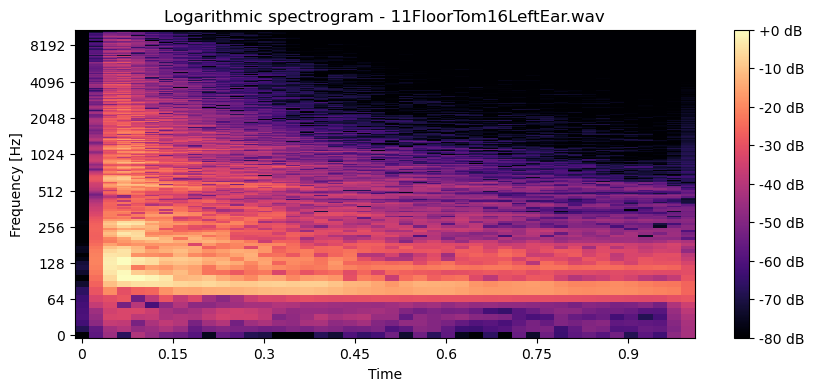

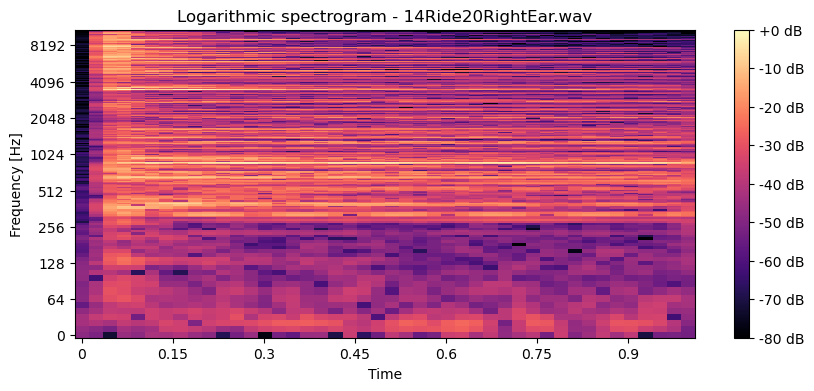

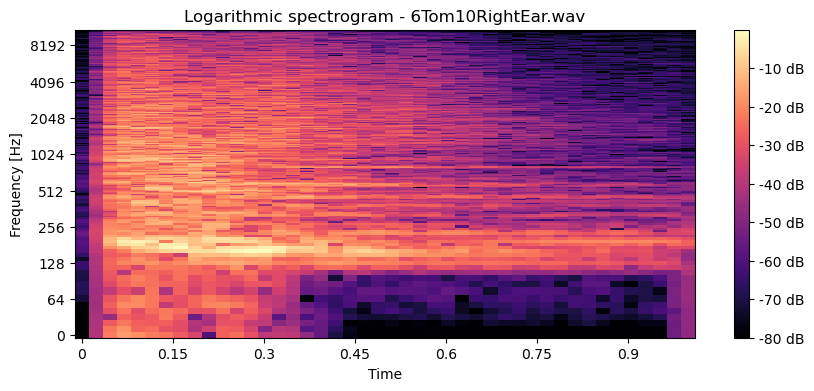

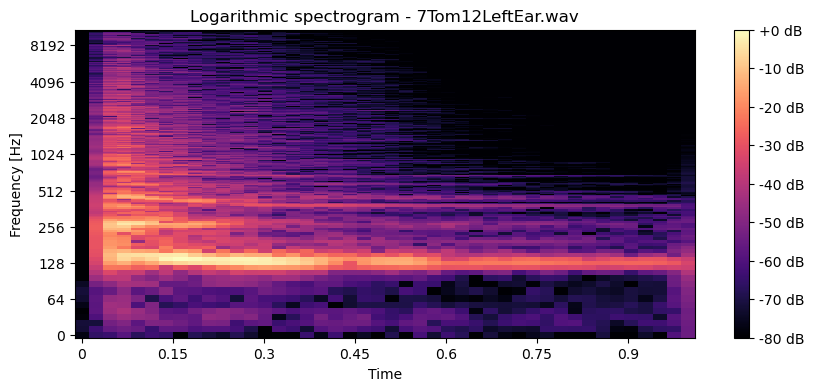

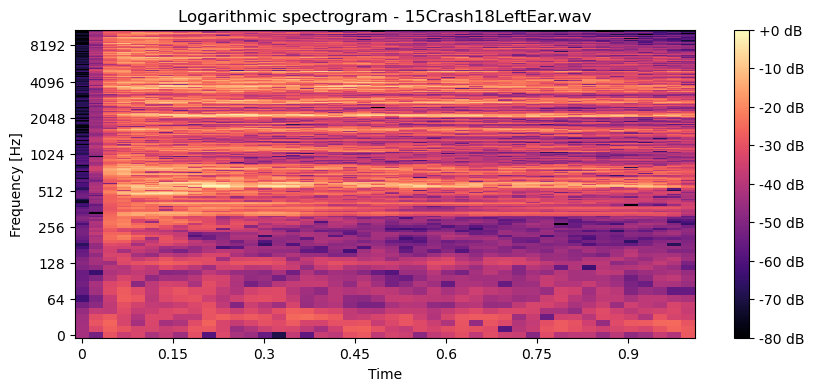

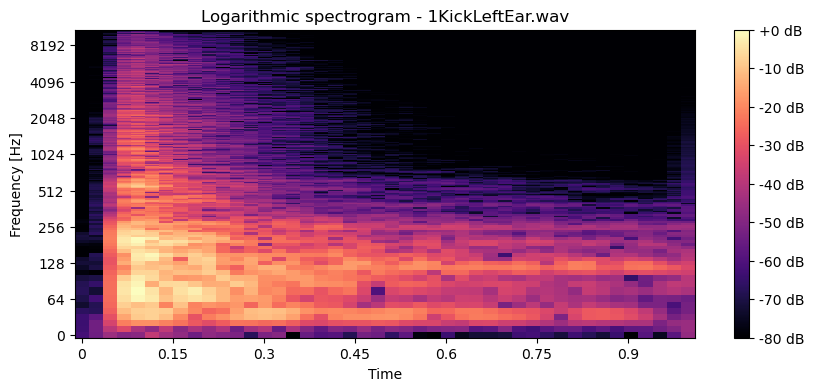

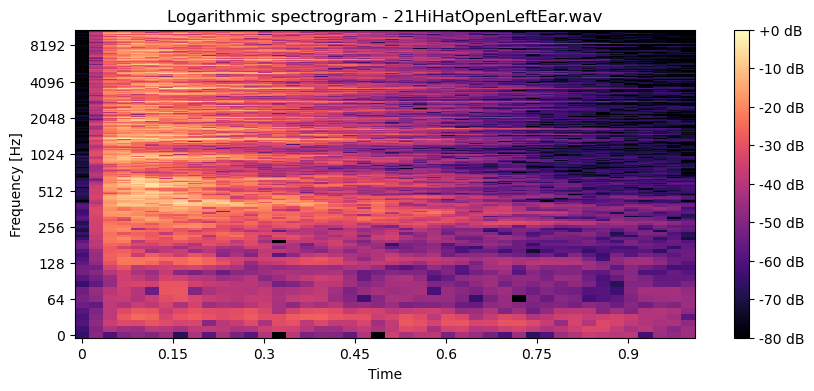

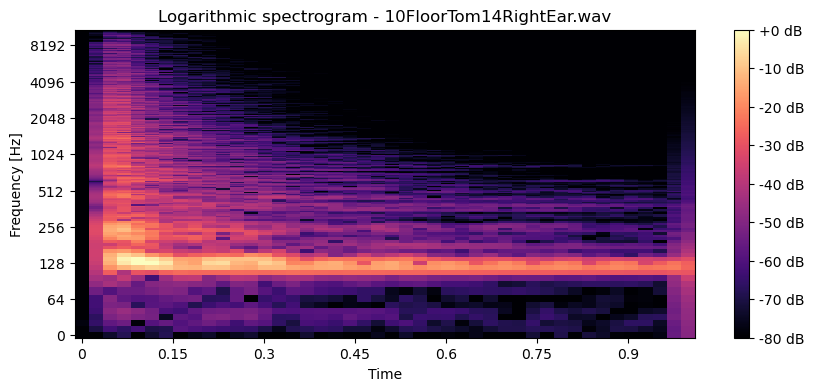

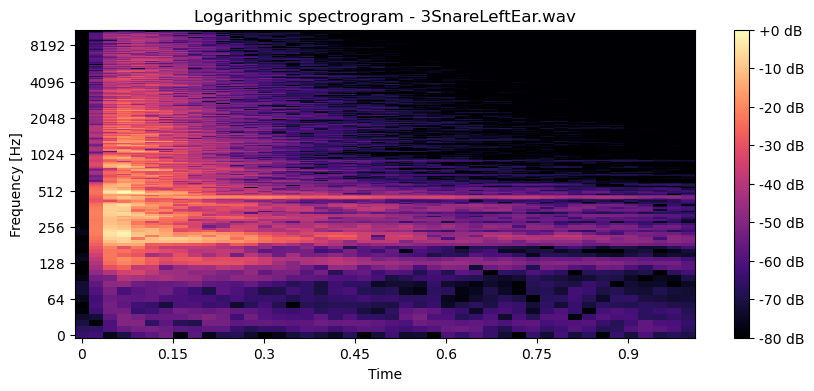

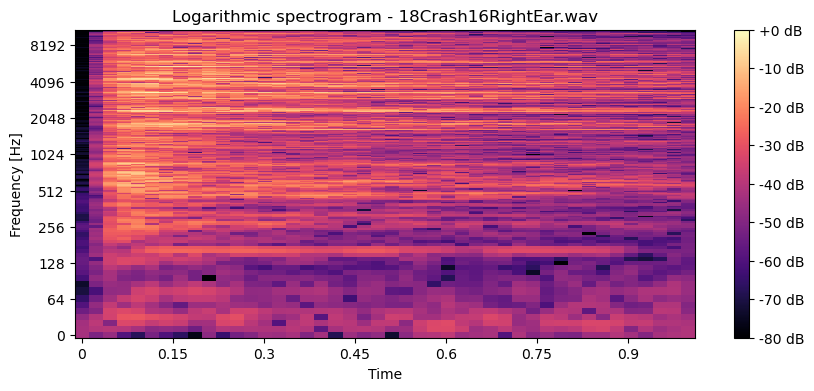

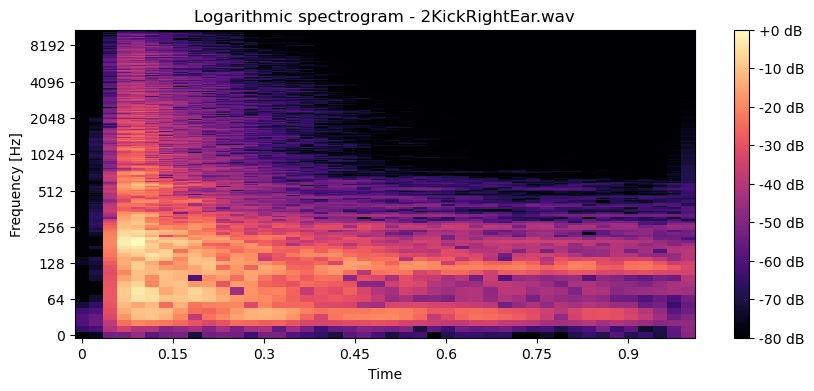

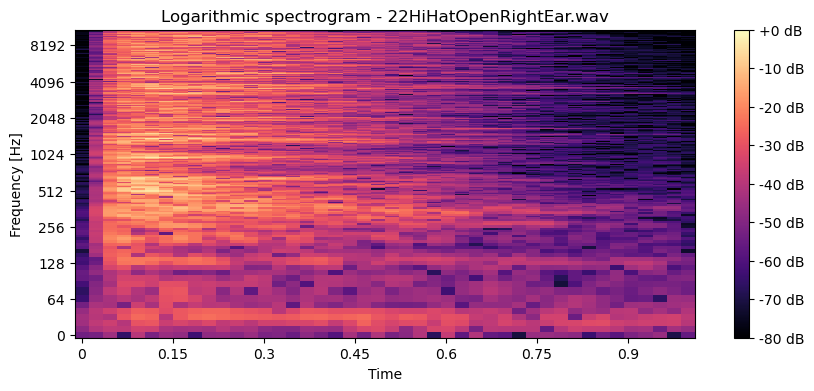

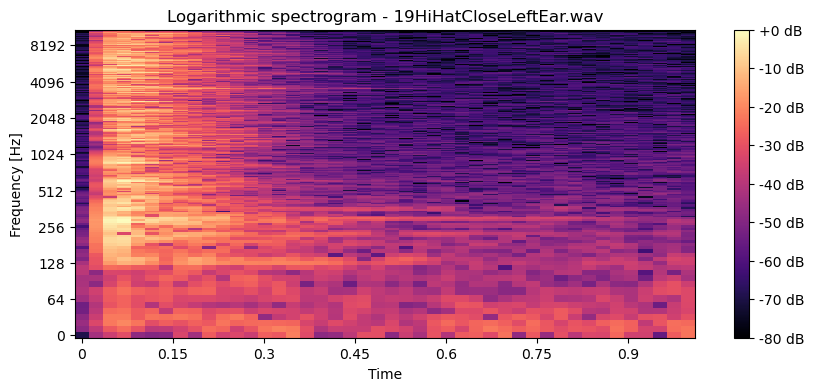

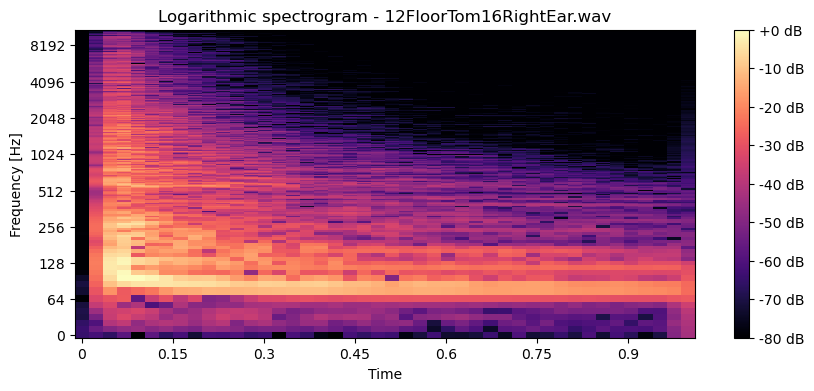

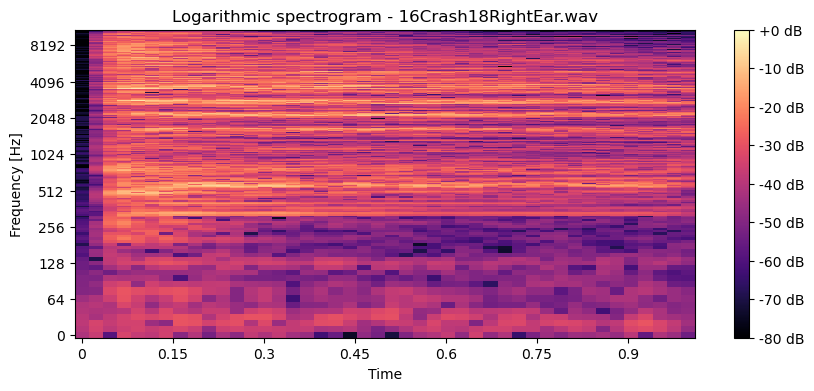

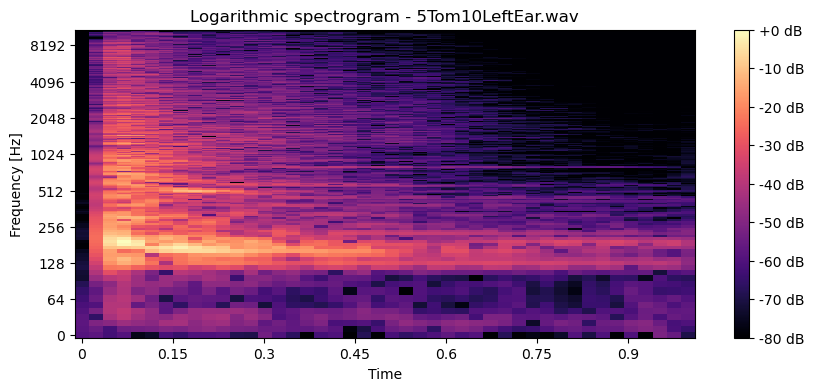

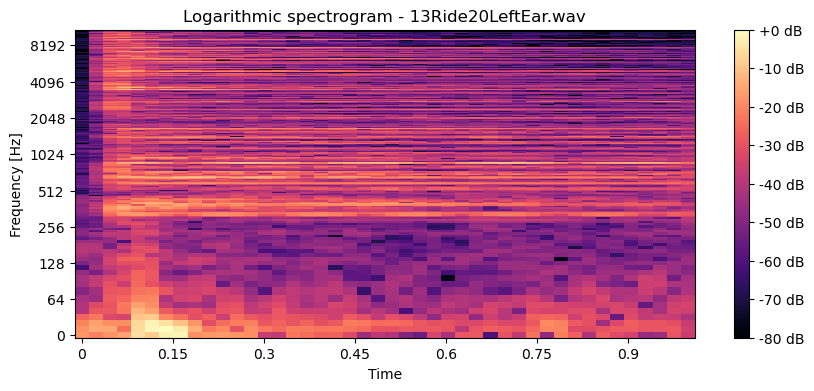

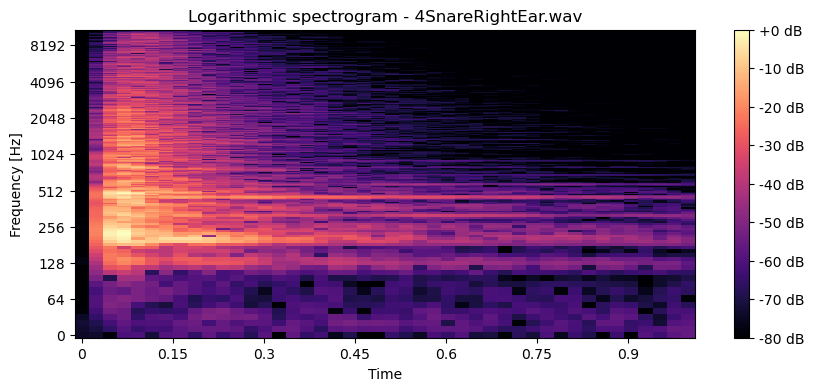

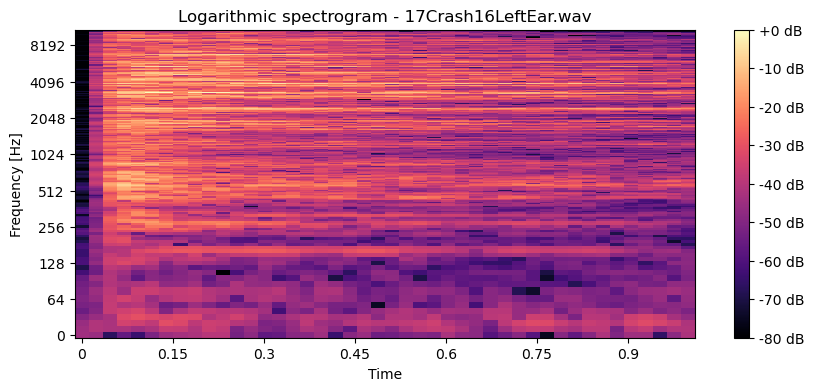

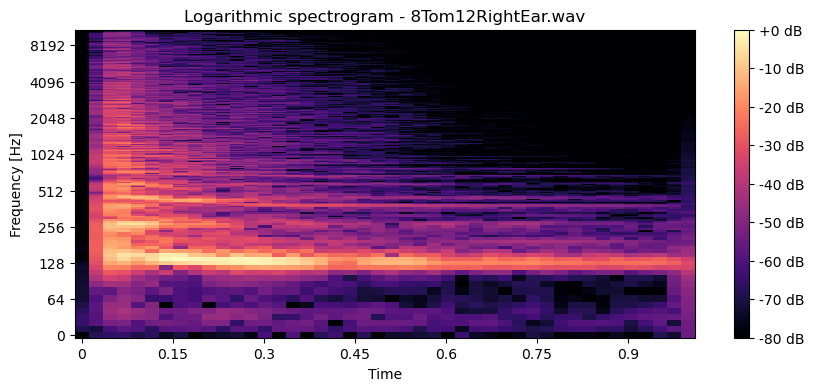

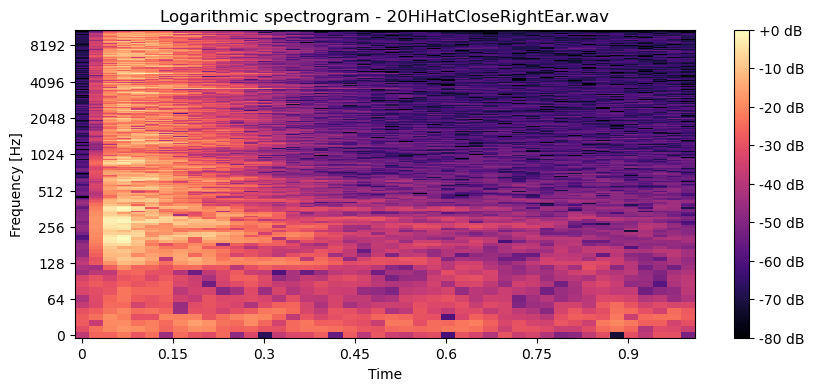

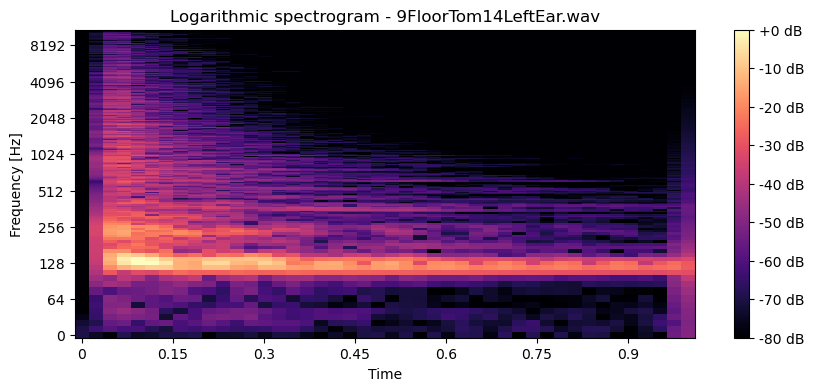

In [3]:
# Visualizar onda de sonido en un espectrograma

# Localizar la función en el folder
import sys
sys.path.append('/Users/chiaravald/Desktop/ACUS340')  #Dirección de la función


# Importar la función
from Spectrogram_plot import plot_spectrograms


#Path to the folder containing audio files
input_dir = '/Users/chiaravald/Desktop/ACUS340/Audios_Drums'
plot_spectrograms(input_dir)




### Cálculo de kurtosis de los audios 



In [4]:
# Path de la carpeta en la que se encuentran los audios
fold_path = '/Users/chiaravald/Desktop/ACUS340/Audios_Drums'

# Almacenar la información para la tabla
file_names = []
kurtosis_values = []

# Leer y calcular la kurtosis de cada audio
for file_name in os.listdir(fold_path):
    if file_name.endswith('.wav'):  # Asegurarse de que solo se lean archivos .wav
        file_path = os.path.join(fold_path, file_name)
        amplitude, sr = librosa.load(file_path, sr=None)  # Leer el archivo de audio
        
        # Calcular la kurtosis
        k = kurtosis(amplitude, fisher=False)  # Para que la distribución normal sea 3
        file_names.append(file_name)
        kurtosis_values.append(k)

# Crear la tabla
df = pd.DataFrame({'File Name': file_names, 'Kurtosis': kurtosis_values})

# Mostrar la tabla en formato HTML
display(HTML(df.to_html(index=False)))



File Name,Kurtosis
11FloorTom16LeftEar.wav,25.635175
14Ride20RightEar.wav,87.062862
6Tom10RightEar.wav,3.894661
7Tom12LeftEar.wav,6.643004
15Crash18LeftEar.wav,5.851272
1KickLeftEar.wav,25.680560
21HiHatOpenLeftEar.wav,14.197760
10FloorTom14RightEar.wav,11.698073
3SnareLeftEar.wav,54.813773
18Crash16RightEar.wav,6.575207


### Agregar ruido gaussiano al ruido de impulsivo 
Se agrega ruido gaussiano a los impulsos para observar cómo cambia la kurtosis, simulando así el ruido de fondo. El objetivo es realizar un análisis que se asemeje más a un escenario de la vida real, manteniendo el análisis de los impulsos por separado.

In [7]:
# Import the function from the .py file
from kurtosis_plus_gauss import kurtosis_plus_gauss


# Se definen los parámetros de entrada:

folderPath = '/Users/chiaravald/Desktop/ACUS340/Audios_Drums'
excel_path = '/Users/chiaravald/Desktop/ACUS340/Audios_Drums/Drums.xlsx'
newpath = '/Users/chiaravald/Desktop/ACUS340/Audio_Drums_Impulsos_wGauss'
lowerdB = 70
upperdB = 110
kurtosis_plus_gauss(folderPath, excel_path, newpath, lowerdB, upperdB)
Tablek = kurtosis_plus_gauss(folderPath, excel_path, newpath, lowerdB, upperdB)
print(Tablek)

                           Original         70         75         80  \
11FloorTom16LeftEar.wav   22.635174   9.724078   3.151805   0.582082   
14Ride20RightEar.wav      84.062857  84.047209  84.071221  83.732940   
6Tom10RightEar.wav         0.894662   0.894627   0.894633   0.894724   
7Tom12LeftEar.wav          3.643005   3.640710   3.632335   3.624828   
15Crash18LeftEar.wav       2.851270   2.850207   2.852352   2.846251   
1KickLeftEar.wav          22.680559  22.679465  22.673763  22.660596   
21HiHatOpenLeftEar.wav    11.197763  11.194933  11.195058  11.195280   
10FloorTom14RightEar.wav   8.698074   8.698397   8.698444   8.692499   
3SnareLeftEar.wav         51.813775  51.807666  51.807647  51.774379   
18Crash16RightEar.wav      3.575207   3.575601   3.576281   3.573169   
2KickRightEar.wav         46.666109  46.641137  46.613486  46.632314   
22HiHatOpenRightEar.wav    9.463554   9.462106   9.447816   9.395396   
19HiHatCloseLeftEar.wav   57.935275  57.816130  57.438115  56.87

### Conclusiones y trabajos a futuro

A partir de los gráficos de amplitud por tiempo, se pueden notar las diferentes formas de onda que tiene cada elemento de la batería. A pesar de tener la característica forma de ruido impulsivo, con una zona con un peak muy alto que decae rápidamente, la presión decae de forma distinta en cada gráfico. Por ejemplo el Crash y el Ride no llegan a decaer del todo en el intervalo del segundo en el que se grabó el platillo. El Floor Tom por otro lado, va decayendo en forma de ondas. Además, se puede notar que las formas de onda varían dependiendo del lado de la oreja en el que fueron grabados. Estas características son importantes ya que se ven reflejadas en los distintos valores de la kurtosis. 

Los espectrogramas nos muestran el comportamiento de cada uno de estos audios en sus distintas frecuencias. Esto no afecta la kurtosis directamente, sin embargo es un elemento interesante de analizar a futuro ya que estas distintas distribuciones espectrales podrían ser dañinas en distintas medidas a los cilios de la cóclea. 

En cuanto a los valores de kurtosis de los impulsos por separado, podemos ver que el Ride 20 del oído derecho es el que tiene mayor valor de kurtosis, por lo tanto causa un mayor daño auditivo. La caja (Snare), es otro de los elementos con mayor valor de kurtosis, después del Hi Hat cerrado del oído izquierdo. El Tom 10 del oído derecho presenta el valor de kurtosis más cercano a 3, revisando el gráfico de onda es un ruido muy parecido al ruido gaussiano en la zona con más amplitud. Esta diferencia de valores de kurtosis entre los oidos derecho e izquierdo, confirman lo que Chasin (1998) afirma acerca de que los baterístas presentan máyor sordera en el oído izquierdo que en el derecho.

Cuando se agrega el ruido gaussiano la kurtosis del Ride 20, el cual como impulso aislado es el más dañino, decae significativamente a medida que aumentan los dB del ruido gaussiano. En contraste, el Hi Hat cerrado del oido izquierdo y derecho se mantiene relativamente constantes hasta que se le suma 90 dB. Este mismo comportamiento se puede ver en el Floor Tom 16 del oido derecho, o en la suma de 95 dB en el Ride 20 del oido izquierdo. En general. el resto los elementos van variando sus valores de kurtosis lentamente con la suma de los dB. Todos los valores de kurtosis van decreciendo con la suma del ruido gaussiano.


Este trabajo nos da una primera idea del potencial daño auditivo que puede causar este instrumento de percución. Sin embargo, hay muchos más análisis que se pueden hacer. Entre ellos comparar estos resultados con otros métodos de medida de riesgo auditivo, por ejemplo el algoritmo AHAAH, el cual es un modelo electroacústico que modela el oído humano (elaborado por Price en 2007). Esto podría dar pie a un análisis de los diferentes espectros de frecuencia y sus consecuencias en el riesgo auditivo. También, se podrían hacer más grabaciones de la batería para sacar una media de los valores de kurtosis de cada una y así tener valores más precisos.


### Referencias


[1] ANSI S3.44 (1996). Determination of occupational noise exposure and estimation of noise-induced hearing
impairment, American National Standard ANSI S3.44-1996. Acoustical Society of America, Melville, New
York.

[2] Arenas, JP (2021). Impulse Noise: A Real Threat for Workers and a Challenge for Acousticians. Int. J. Acoust.
Vib. 26:272-273.

[3] Berger EH, Royster LH, Royster JD, Driscoll DP, Layne M (2000). The Noise Manual. 5th ed. Fairfax, VA: Am.
Ind. Hygiene Assoc.

[4] Chasin, M. (1998). Musicians and the prevention of hearing loss. The Hearing Journal, 51(9).

[5] G.S. Goley, W.J. Song, and J.H. Kim (2011). Kurtosis corrected sound pressure level as a noise metric for risk assessment of occupational noises. Journal of the Acoustical Society of America, 129(3):1475–1481.

[6] ISO 1999 (1990). Acoustics - Determination of occupational noise exposure and estimation of noise-induced
hearing impairment. Geneva: International Organization for Standardization.

[7] M. Zhang, X. Gao, W.J. Murphy, C.A. Kardous, X. Sun, W. Hu, W. Gong, J. Li, and W. Qiu (2022). Estimation of occupational noise-induced hearing loss using kurtosis-adjusted noise exposure levels. Ear & Hearing, 43(6):1881–1892.

[8] Price GR (2007). Validation of the auditory hazard assessment algorithm for the human with impulse noise
data. J. Acoust. Soc. Am. 122:2786–2802.

[9] W. Qiu, W.J. Murphy, and A. Suter (2020). Kurtosis: a new tool for noise analysis. Acoustics Today, 16(4): 39–47.